In [2]:
import scipy
scipy.__version__
import iminuit

In [3]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
from os.path import expandvars
import numpy as np
import matplotlib.pylab as plt
import argparse
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi2
import scipy

import os, sys
sys.path.append('/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss')

from RecoPulseLikelihoodRatio import likelihoodfit
from likelihoodHelpers import log_likelihood_biGauss, log_likelihood_doublePeak, likelihood_ratio_doublePeak, likelihood_ratio_biGauss, biGauss, double_peak
import csv

In [4]:
read_file = open('/data/p-one/akatil/analysis/RecoPulses/RecoPulseFitInfo_correcectedchi2.csv', 'r')

file_num, frame_num, lepton, DOM, string = ([]), ([]), ([]), ([]), ([])
binEntries_mean, success_biGauss, success_doublePeak = ([]), ([]), ([])
biGauss_pos, biGauss_wid, biGauss_rat, biGauss_amp = ([]), ([]), ([]), ([])
doublePeak_amp1, doublePeak_amp2, doublePeak_pos1, doublePeak_pos2 = ([]), ([]), ([]), ([])
doublePeak_rat1, doublePeak_rat2, doublePeak_wid1, doublePeak_wid2 = ([]), ([]), ([]), ([])
area_data, area_biGauss_fit, area_doublePeak_fit = ([]), ([]), ([])
gof_biGauss, gof_doublePeak = ([]), ([])
with read_file:

    reader = csv.DictReader(read_file)
    
    for row in reader:
        file_num = np.append(file_num, row['file'])
        frame_num = np.append(frame_num, row['frame'])
        lepton =np.append(lepton, row['lepton_type'])
        DOM = np.append(DOM, row['DOM']) #DOM and string have been interchanged
        string = np.append(string, row['string'])
        binEntries_mean = np.append(binEntries_mean, float(row['binEntries_mean']))
        success_biGauss = np.append(success_biGauss, row['success_biGauss'])
        success_doublePeak = np.append(success_doublePeak, row['success_doublePeak'])
        biGauss_pos = np.append(biGauss_pos, float(row['biGauss_pos']))
        biGauss_wid = np.append(biGauss_wid, float(row['biGauss_wid']))
        biGauss_rat = np.append(biGauss_rat, float(row['biGauss_rat']))
        biGauss_amp = np.append(biGauss_amp, float(row['biGauss_amp']))
        doublePeak_pos1 = np.append(doublePeak_pos1, float(row['doublePeak_pos1']))
        doublePeak_wid1 = np.append(doublePeak_wid1, float(row['doublePeak_wid1']))
        doublePeak_rat1 = np.append(doublePeak_rat1, float(row['doublePeak_rat1']))
        doublePeak_amp1 = np.append(doublePeak_amp1, float(row['doublePeak_amp1']))
        doublePeak_pos2 = np.append(doublePeak_pos2, float(row['doublePeak_pos2']))
        doublePeak_wid2 = np.append(doublePeak_wid2, float(row['doublePeak_wid2']))
        doublePeak_rat2 = np.append(doublePeak_rat2, float(row['doublePeak_rat2']))
        doublePeak_amp2 = np.append(doublePeak_amp2, float(row['doublePeak_amp2']))
        area_data = np.append(area_data, float(row['area_data']))
        area_biGauss_fit = np.append(area_biGauss_fit, float(row['area_biGauss_fit']))
        area_doublePeak_fit = np.append(area_doublePeak_fit, float(row['area_doublePeak_fit']))
        gof_biGauss = np.append(gof_biGauss, float(row['gof_biGauss']))
        gof_doublePeak = np.append(gof_doublePeak, float(row['gof_doublePeak']))

In [5]:
'''
Selecting DOMs with goodness of fit < 2, only double peak fit chi2 values are considered
'''
gof_bool_biGauss = (gof_biGauss > 0)&(gof_biGauss < 2)
gof_bool_dp = (gof_doublePeak > 0)&(gof_doublePeak < 2)

select_gof_biGauss = gof_biGauss[gof_bool_dp]
select_gof_dp = gof_doublePeak[gof_bool_dp]
select_file_num = file_num[gof_bool_dp]
select_frame_num = frame_num[gof_bool_dp]
select_string = DOM[gof_bool_dp]
select_DOM = string[gof_bool_dp]

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [6]:
gof_biGauss

array([12.9562574 ,  1.94526641,  9.48373854, ..., 14.77778603,
       10.41280474,  8.01624411])

1392
OMKey(9,19,0)
Now Histogramming


/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)
/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:56: RuntimeWarning: divide by zero encountered in log
  L = model - (n*np.log(model))
/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:64: RuntimeWarning: invalid value encountered in log
  L = model - (n*np.log(model))


1420
OMKey(2,4,0)
Now Histogramming
1461
OMKey(4,4,0)
Now Histogramming


/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:56: RuntimeWarning: invalid value encountered in log
  L = model - (n*np.log(model))


1465
OMKey(4,5,0)
Now Histogramming
1470
OMKey(8,18,0)
Now Histogramming
1548
OMKey(5,1,0)
Now Histogramming
1587
OMKey(3,10,0)
Now Histogramming
1626
OMKey(7,17,0)
Now Histogramming


/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:72: RuntimeWarning: invalid value encountered in log
  val = model - n + (n*np.log(n/model))
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in log


('PARAMETERS -', 205.4844022069717, 256.96501592267566, 204.18885740713324, 75.27315573596296, 227.74341719616234, 187.21449367119305, 198.1133914139616, -567.6643581165962)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -0.72855826,  20.        ,   1.        , 199.        ,
        24.48444198,  20.        ,   1.        , 199.        ]), -1422.7739802932583)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -0.72855826,  20.        ,   1.        , 199.        ,
        24.48444198,  20.        ,   1.        , 199.        ]), -1422.7739802932583)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  0.27144174,  20.        ,   1.        , 199.        ,
        24.48444198,  20.        ,   1.        , 199.        ]), -1296.8788269820798)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -2.34659226,  20.        ,   1.        , 199.        ,
        24.48444198,  20.        ,   1.     

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.75467065,   23.39193688,    0.81295282,  161.0140373 ,
         37.21122967,   20.67890562,    0.95099269, -213.43016064]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   23.39193688,    0.81295282,  161.0140373 ,
         37.21122967,   20.67890562,    0.95099269, -213.43016064]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   23.39193688,    0.81295282,  161.0140373 ,
         37.21122967,   20.67890562,    0.95099269, -213.43016064]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   24.39193688,    0.81295282,  161.0140373 ,
         37.21122967,   20.67890562,    0.95099269, -213.43016064]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   26.00997088,    0.81295282,  161.0140373 ,
         37.21122967,   20.67

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    3.40088179,  163.60196626,
         39.79915864,   23.26683458,    3.53892166, -210.84223168]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    4.40088179,  163.60196626,
         39.79915864,   23.26683458,    3.53892166, -210.84223168]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    6.01891579,  163.60196626,
         39.79915864,   23.26683458,    3.53892166, -210.84223168]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    4.40088179,  163.60196626,
         39.79915864,   23.26683458,    3.53892166, -210.84223168]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    5.01891576,  163.60196626,
         39.79915864,   23.26

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  167.18989522,
         42.3870876 ,   25.85476354,    6.12685062, -208.25430272]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  168.80792922,
         42.3870876 ,   25.85476354,    6.12685062, -208.25430272]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  167.18989522,
         42.3870876 ,   25.85476354,    6.12685062, -208.25430272]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  167.80792919,
         42.3870876 ,   25.85476354,    6.12685062, -208.25430272]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  168.1898952 ,
         42.3870876 ,   25.85

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         45.97501656,   28.4426925 ,    8.71477958, -205.66637376]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         46.59305053,   28.4426925 ,    8.71477958, -205.66637376]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         46.97501654,   28.4426925 ,    8.71477958, -205.66637376]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         47.21108452,   28.4426925 ,    8.71477958, -205.66637376]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         47.35698256,   28.44

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   8.62266826,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.26668943,   11.30270854, -203.0784448 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   8.62266826,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.41258746,   11.30270854, -203.0784448 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   8.62266826,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.50275741,   11.30270854, -203.0784448 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   8.62266826,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.55848551,   11.30270854, -203.0784448 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   8.62266826,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.59

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.21059722,   38.91951065,   16.34052659,  176.54161107,
         52.73880344,   36.20647938,   16.4529434 , -200.49051584]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.21059722,   38.91951065,   16.34052659,  176.54161107,
         52.73880344,   36.20647938,   16.47856646, -200.49051584]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.21059722,   38.91951065,   16.34052659,  176.54161107,
         52.73880344,   36.20647938,   16.47856646, -200.49051584]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.21059722,   38.91951065,   16.34052659,  176.54161107,
         52.73880344,   36.20647938,   16.47856646, -199.49051584]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.21059722,   38.91951065,   16.34052659,  176.54161107,
         52.73880344,   36.20

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  14.79852618,   41.50743961,   18.92845556,  179.12954003,
         55.32673241,   38.79440835,   19.06649542, -195.31465791]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  16.41656018,   41.50743961,   18.92845556,  179.12954003,
         55.32673241,   38.79440835,   19.06649542, -195.31465791]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  14.79852618,   41.50743961,   18.92845556,  179.12954003,
         55.32673241,   38.79440835,   19.06649542, -195.31465791]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  15.41656015,   41.50743961,   18.92845556,  179.12954003,
         55.32673241,   38.79440835,   19.06649542, -195.31465791]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  15.79852616,   41.50743961,   18.92845556,  179.12954003,
         55.32673241,   38.79

(array([  18.9743841 ,   44.09536857,   21.51638452,  181.71746899,
         57.91466137,   41.38233731,   21.65442439, -192.72672895]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   45.09536857,   21.51638452,  181.71746899,
         57.91466137,   41.38233731,   21.65442439, -192.72672895]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   46.71340257,   21.51638452,  181.71746899,
         57.91466137,   41.38233731,   21.65442439, -192.72672895]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   45.09536857,   21.51638452,  181.71746899,
         57.91466137,   41.38233731,   21.65442439, -192.72672895]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   45.71340255,   21.51638452,  181.71746899,
         57.91466137,   41.38233731,   21.65442439, -192.72672895]), nan)
('*****************Dou

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   25.10431348,  184.30539795,
         60.50259033,   43.97026627,   24.24235335, -190.13879999]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   25.72234745,  184.30539795,
         60.50259033,   43.97026627,   24.24235335, -190.13879999]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   26.10431346,  184.30539795,
         60.50259033,   43.97026627,   24.24235335, -190.13879999]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   26.34038144,  184.30539795,
         60.50259033,   43.97026627,   24.24235335, -190.13879999]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   26.48627948,  184.30539795,
         60.50259033,   43.97

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  187.89332691,
         63.09051929,   46.55819523,   26.83028231, -187.55087103]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  189.51136091,
         63.09051929,   46.55819523,   26.83028231, -187.55087103]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  187.89332691,
         63.09051929,   46.55819523,   26.83028231, -187.55087103]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  188.51136089,
         63.09051929,   46.55819523,   26.83028231, -187.55087103]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  188.8933269 ,
         63.09051929,   46.55

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  192.06918483,
         67.67844824,   49.14612419,   29.41821127, -184.96294207]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  192.06918483,
         67.91451622,   49.14612419,   29.41821127, -184.96294207]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  192.06918483,
         68.06041426,   49.14612419,   29.41821127, -184.96294207]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  192.06918483,
         68.1505842 ,   49.14612419,   29.41821127, -184.96294207]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  192.06918483,
         68.2063123 ,   49.14

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  29.32609995,   57.03501338,   34.45602932,  194.6571138 ,
         70.85430617,   54.20618911,   32.00614023, -182.3750131 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  29.32609995,   57.03501338,   34.45602932,  194.6571138 ,
         70.85430617,   54.2619172 ,   32.00614023, -182.3750131 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  29.32609995,   57.03501338,   34.45602932,  194.6571138 ,
         70.85430617,   54.29635906,   32.00614023, -182.3750131 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  29.32609995,   57.03501338,   34.45602932,  194.6571138 ,
         70.85430617,   54.32198212,   32.00614023, -182.3750131 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  29.32609995,   57.03501338,   34.45602932,  194.6571138 ,
         70.85430617,   54.32

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   59.62294234,   37.04395829,  197.24504276,
         73.44223514,   56.90991108,   37.1563751 , -179.78708414]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   59.62294234,   37.04395829,  197.24504276,
         73.44223514,   56.90991108,   37.18199816, -179.78708414]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   59.62294234,   37.04395829,  197.24504276,
         73.44223514,   56.90991108,   37.18199816, -179.78708414]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   59.62294234,   37.04395829,  197.24504276,
         73.44223514,   56.90991108,   37.18199816, -178.78708414]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   59.62294234,   37.04395829,  197.24504276,
         73.44223514,   56.90

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  35.50195787,   62.2108713 ,   39.63188725,  199.83297172,
         76.0301641 ,   59.49784004,   39.76992712, -174.61122622]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  37.11999187,   62.2108713 ,   39.63188725,  199.83297172,
         76.0301641 ,   59.49784004,   39.76992712, -174.61122622]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  35.50195787,   62.2108713 ,   39.63188725,  199.83297172,
         76.0301641 ,   59.49784004,   39.76992712, -174.61122622]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  36.11999185,   62.2108713 ,   39.63188725,  199.83297172,
         76.0301641 ,   59.49784004,   39.76992712, -174.61122622]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  36.50195786,   62.2108713 ,   39.63188725,  199.83297172,
         76.0301641 ,   59.49

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   65.79880027,   42.21981621,  202.42090068,
         78.61809306,   62.085769  ,   42.35785608, -172.02329726]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   66.41683424,   42.21981621,  202.42090068,
         78.61809306,   62.085769  ,   42.35785608, -172.02329726]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   66.79880025,   42.21981621,  202.42090068,
         78.61809306,   62.085769  ,   42.35785608, -172.02329726]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   67.03486823,   42.21981621,  202.42090068,
         78.61809306,   62.085769  ,   42.35785608, -172.02329726]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   67.18076627,   42.21981621,  202.42090068,
         78.61809306,   62.08

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  42.26574476,   69.97465819,   46.80774516,  205.00882964,
         81.20602202,   64.67369796,   44.94578504, -169.4353683 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  42.26574476,   69.97465819,   47.04381314,  205.00882964,
         81.20602202,   64.67369796,   44.94578504, -169.4353683 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  42.26574476,   69.97465819,   47.18971117,  205.00882964,
         81.20602202,   64.67369796,   44.94578504, -169.4353683 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  42.26574476,   69.97465819,   47.27988112,  205.00882964,
         81.20602202,   64.67369796,   44.94578504, -169.4353683 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  42.26574476,   69.97465819,   47.33560922,  205.00882964,
         81.20602202,   64.67

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  44.85367372,   72.56258715,   49.98360309,  210.06889456,
         83.79395098,   67.26162692,   47.533714  , -166.84743934]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  44.85367372,   72.56258715,   49.98360309,  210.12462265,
         83.79395098,   67.26162692,   47.533714  , -166.84743934]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  44.85367372,   72.56258715,   49.98360309,  210.15906451,
         83.79395098,   67.26162692,   47.533714  , -166.84743934]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  44.85367372,   72.56258715,   49.98360309,  210.18468757,
         83.79395098,   67.26162692,   47.533714  , -166.84743934]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  44.85367372,   72.56258715,   49.98360309,  210.18468757,
         83.79395098,   67.26

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   52.57153206,  212.77261653,
         88.8540159 ,   69.84955588,   50.12164296, -164.25951037]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   52.57153206,  212.77261653,
         88.90974399,   69.84955588,   50.12164296, -164.25951037]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   52.57153206,  212.77261653,
         88.94418585,   69.84955588,   50.12164296, -164.25951037]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   52.57153206,  212.77261653,
         88.96980891,   69.84955588,   50.12164296, -164.25951037]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   52.57153206,  212.77261653,
         88.96980891,   69.84

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.36054549,
         91.55773787,   75.02541381,   52.70957192, -161.67158141]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.36054549,
         91.55773787,   75.02541381,   52.70957192, -161.67158141]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.36054549,
         91.55773787,   75.02541381,   53.70957192, -161.67158141]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.36054549,
         91.55773787,   75.02541381,   55.32760592, -161.67158141]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.36054549,
         91.55773787,   75.02

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         94.14566683,   77.61334277,   57.88542985, -159.08365245]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         94.14566683,   77.61334277,   57.88542985, -158.08365245]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         94.14566683,   77.61334277,   57.88542985, -156.46561845]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         94.14566683,   77.61334277,   57.88542985, -158.08365245]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         94.14566683,   77.61

(array([  56.20538956,   82.914303  ,   60.33531894,  220.53640341,
         96.73359579,   80.20127173,   60.47335881, -153.90779453]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  57.82342356,   82.914303  ,   60.33531894,  220.53640341,
         96.73359579,   80.20127173,   60.47335881, -153.90779453]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  56.20538956,   82.914303  ,   60.33531894,  220.53640341,
         96.73359579,   80.20127173,   60.47335881, -153.90779453]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  56.82342354,   82.914303  ,   60.33531894,  220.53640341,
         96.73359579,   80.20127173,   60.47335881, -153.90779453]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  57.20538955,   82.914303  ,   60.33531894,  220.53640341,
         96.73359579,   80.20127173,   60.47335881, -153.90779453]), nan)
('*****************Dou

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   88.12026596,   62.9232479 ,  223.12433237,
         99.32152475,   82.78920069,   63.06128777, -151.31986557]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   86.50223196,   62.9232479 ,  223.12433237,
         99.32152475,   82.78920069,   63.06128777, -151.31986557]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   87.12026593,   62.9232479 ,  223.12433237,
         99.32152475,   82.78920069,   63.06128777, -151.31986557]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   87.50223194,   62.9232479 ,  223.12433237,
         99.32152475,   82.78920069,   63.06128777, -151.31986557]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   87.73829992,   62.9232479 ,  223.12433237,
         99.32152475,   82.78

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   66.51117686,  225.71226133,
        101.90945371,   85.37712965,   65.64921673, -148.7319366 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   68.12921086,  225.71226133,
        101.90945371,   85.37712965,   65.64921673, -148.7319366 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   66.51117686,  225.71226133,
        101.90945371,   85.37712965,   65.64921673, -148.7319366 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   67.12921084,  225.71226133,
        101.90945371,   85.37712965,   65.64921673, -148.7319366 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   67.51117685,  225.71226133,
        101.90945371,   85.37

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  83.75653585,  107.11444569,   70.98579965,   50.3164503 ,
        104.49738267,   87.96505862,   68.23714569, -146.14400764]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  83.75653585,  107.11444569,   70.98579965,  226.6821563 ,
        104.49738267,   87.96505862,   68.23714569, -146.14400764]), -1027.2058222336902)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  83.75653585,  107.11444569,   70.98579965,  159.31645304,
        104.49738267,   87.96505862,   68.23714569, -146.14400764]), -1343.7888049886924)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  83.75653585,  107.11444569,   70.98579965,  117.68215799,
        104.49738267,   87.96505862,   68.23714569, -146.14400764]), -1459.9848023078782)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  83.75653585,  107.11444569,   70.985799

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.34446481,  109.70237465,   73.57372861,  103.78261891,
         87.02535829,   90.55298758,   70.82507466, -143.55607868]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.34446481,  109.70237465,   73.57372861,  103.78261891,
         87.4073243 ,   90.55298758,   70.82507466, -143.55607868]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.34446481,  109.70237465,   73.57372861,  103.78261891,
         87.64339228,   90.55298758,   70.82507466, -143.55607868]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.34446481,  109.70237465,   73.57372861,  103.78261891,
         87.78929031,   90.55298758,   70.82507466, -143.55607868]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.34446481,  109.70237465,   73.57372861,  103.78261891,
         87.87946026,   90.55

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  112.29030361,   76.16165757,  106.37054787,
         90.58318223,   95.3769845 ,   73.41300362, -140.96814972]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  112.29030361,   76.16165757,  106.37054787,
         90.58318223,   95.52288254,   73.41300362, -140.96814972]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  112.29030361,   76.16165757,  106.37054787,
         90.58318223,   95.61305249,   73.41300362, -140.96814972]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  112.29030361,   76.16165757,  106.37054787,
         90.58318223,   95.66878058,   73.41300362, -140.96814972]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  112.29030361,   76.16165757,  106.37054787,
         90.58318223,   95.70

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.74958653,  108.95847684,
         93.1711112 ,   98.31677446,   78.38289858, -138.38022076]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.74958653,  108.95847684,
         93.1711112 ,   98.31677446,   78.47306853, -138.38022076]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.74958653,  108.95847684,
         93.1711112 ,   98.31677446,   78.52879662, -138.38022076]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.74958653,  108.95847684,
         93.1711112 ,   98.31677446,   78.56323848, -138.38022076]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.74958653,  108.95847684,
         93.1711112 ,   98.31

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  96.69618065,  120.0540905 ,   83.92544446,  114.13433476,
         98.34696912,  103.49263238,   83.76471946, -130.61643387]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  94.10825169,  117.46616154,   81.3375155 ,  111.5464058 ,
         95.75904016,  100.90470342,   81.1767905 , -133.20436284]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  95.10825169,  117.46616154,   81.3375155 ,  111.5464058 ,
         95.75904016,  100.90470342,   81.1767905 , -133.20436284]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  96.72628569,  117.46616154,   81.3375155 ,  111.5464058 ,
         95.75904016,  100.90470342,   81.1767905 , -133.20436284]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  95.10825169,  117.46616154,   81.3375155 ,  111.5464058 ,
         95.75904016,  100.90

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  121.67212447,   83.92544446,  114.13433476,
         98.34696912,  103.49263238,   83.76471946, -130.61643387]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  122.05409048,   83.92544446,  114.13433476,
         98.34696912,  103.49263238,   83.76471946, -130.61643387]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  122.29015846,   83.92544446,  114.13433476,
         98.34696912,  103.49263238,   83.76471946, -130.61643387]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  122.4360565 ,   83.92544446,  114.13433476,
         98.34696912,  103.49263238,   83.76471946, -130.61643387]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  122.52622645,   83.92544446,  114.13433476,
         98.34696912,  103.49

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   88.98550937,  116.72226372,
        100.93489808,   88.35702532,   85.58960044, -268.35300345]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   89.04123746,  116.72226372,
        100.93489808,   88.35702532,   85.58960044, -268.35300345]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   89.07567932,  116.72226372,
        100.93489808,   88.35702532,   85.58960044, -268.35300345]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   89.10130238,  116.72226372,
        100.93489808,   88.35702532,   85.58960044, -268.35300345]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   89.10130238,  116.72226372,
        100.93489808,   88.35

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 104.45996754,  127.81787738,   91.68923134,  121.89812164,
        104.52282704,   90.94495428,   88.1775294 , -265.76507449]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 104.45996754,  127.81787738,   91.68923134,  121.89812164,
        106.14086104,   90.94495428,   88.1775294 , -265.76507449]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 104.45996754,  127.81787738,   91.68923134,  121.89812164,
        104.52282704,   90.94495428,   88.1775294 , -265.76507449]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 104.45996754,  127.81787738,   91.68923134,  121.89812164,
        105.14086102,   90.94495428,   88.1775294 , -265.76507449]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 104.45996754,  127.81787738,   91.68923134,  121.89812164,
        105.52282703,   90.94

        108.69868497,   95.15091722,   90.76545836, -263.17714553]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 107.0478965 ,  130.40580634,   94.2771603 ,  124.48605061,
        108.69868497,   95.53288323,   90.76545836, -263.17714553]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 107.0478965 ,  130.40580634,   94.2771603 ,  124.48605061,
        108.69868497,   95.76895121,   90.76545836, -263.17714553]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 107.0478965 ,  130.40580634,   94.2771603 ,  124.48605061,
        108.69868497,   95.91484925,   90.76545836, -263.17714553]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 107.0478965 ,  130.40580634,   94.2771603 ,  124.48605061,
        108.69868497,   96.00501919,   90.76545836, -263.17714553]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 107.0478965 , 

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   96.86508927,  127.07397957,
        111.28661393,   98.70874116,   95.82552328, -260.58921657]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   96.86508927,  127.07397957,
        111.28661393,   98.70874116,   95.88125137, -260.58921657]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   96.86508927,  127.07397957,
        111.28661393,   98.70874116,   95.91569323, -260.58921657]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   96.86508927,  127.07397957,
        111.28661393,   98.70874116,   95.94131629, -260.58921657]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   96.86508927,  127.07397957,
        111.28661393,   98.70

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 112.22375442,  135.58166427,   99.45301823,  129.66190853,
        113.87454289,  101.29667013,   98.52924525, -255.41335865]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 114.81168338,  138.16959323,  102.04094719,  132.24983749,
        116.46247185,  103.88459909,  101.11717421, -252.82542968]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 112.22375442,  135.58166427,   99.45301823,  129.66190853,
        113.87454289,  101.29667013,   98.52924525, -255.41335865]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 113.22375442,  135.58166427,   99.45301823,  129.66190853,
        113.87454289,  101.29667013,   98.52924525, -255.41335865]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 114.84178842,  135.58166427,   99.45301823,  129.66190853,
        113.87454289,  101.29

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  138.16959323,  102.04094719,  132.24983749,
        116.46247185,  103.88459909,  101.11717421, -252.82542968]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  138.16959323,  102.04094719,  132.24983749,
        116.46247185,  103.88459909,  101.11717421, -252.82542968]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  139.16959323,  102.04094719,  132.24983749,
        116.46247185,  103.88459909,  101.11717421, -252.82542968]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  140.78762723,  102.04094719,  132.24983749,
        116.46247185,  103.88459909,  101.11717421, -252.82542968]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  139.16959323,  102.04094719,  132.24983749,
        116.46247185,  103.88

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  106.24691012,  134.83776645,
        119.05040081,  106.47252805,  103.70510317, -250.23750072]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  106.62887613,  134.83776645,
        119.05040081,  106.47252805,  103.70510317, -250.23750072]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  106.86494412,  134.83776645,
        119.05040081,  106.47252805,  103.70510317, -250.23750072]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  107.01084215,  134.83776645,
        119.05040081,  106.47252805,  103.70510317, -250.23750072]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  107.1010121 ,  134.83776645,
        119.05040081,  106.47

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 122.57547027,  145.93338011,  109.80473407,  139.80766142,
        121.63832977,  109.06045701,  106.29303213, -247.64957176]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 122.57547027,  145.93338011,  109.80473407,  139.89783136,
        121.63832977,  109.06045701,  106.29303213, -247.64957176]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 122.57547027,  145.93338011,  109.80473407,  139.95355946,
        121.63832977,  109.06045701,  106.29303213, -247.64957176]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 122.57547027,  145.93338011,  109.80473407,  139.98800132,
        121.63832977,  109.06045701,  106.29303213, -247.64957176]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 122.57547027,  145.93338011,  109.80473407,  140.01362437,
        121.63832977,  109.06

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 125.16339923,  148.52130907,  112.39266303,  142.60155334,
        126.8141877 ,  114.17625002,  108.88096109, -245.0616428 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 125.16339923,  148.52130907,  112.39266303,  142.60155334,
        126.8141877 ,  114.21069187,  108.88096109, -245.0616428 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 125.16339923,  148.52130907,  112.39266303,  142.60155334,
        126.8141877 ,  114.23631493,  108.88096109, -245.0616428 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 125.16339923,  148.52130907,  112.39266303,  142.60155334,
        126.8141877 ,  114.23631493,  108.88096109, -245.0616428 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 125.16339923,  148.52130907,  112.39266303,  142.60155334,
        126.8141877 ,  114.23

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.75132819,  151.10923804,  114.980592  ,  145.1894823 ,
        129.40211666,  116.8242439 ,  114.05681902, -242.47371384]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.75132819,  151.10923804,  114.980592  ,  145.1894823 ,
        129.40211666,  116.8242439 ,  114.05681902, -241.47371384]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.75132819,  151.10923804,  114.980592  ,  145.1894823 ,
        129.40211666,  116.8242439 ,  114.05681902, -239.85567984]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.75132819,  151.10923804,  114.980592  ,  145.1894823 ,
        129.40211666,  116.8242439 ,  114.05681902, -241.47371384]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.75132819,  151.10923804,  114.980592  ,  145.1894823 ,
        129.40211666,  116.82

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 131.33925715,  153.697167  ,  117.56852096,  147.77741126,
        131.99004562,  119.41217286,  116.64474798, -237.29785591]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 132.95729115,  153.697167  ,  117.56852096,  147.77741126,
        131.99004562,  119.41217286,  116.64474798, -237.29785591]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 131.33925715,  153.697167  ,  117.56852096,  147.77741126,
        131.99004562,  119.41217286,  116.64474798, -237.29785591]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 131.95729113,  153.697167  ,  117.56852096,  147.77741126,
        131.99004562,  119.41217286,  116.64474798, -237.29785591]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 132.33925714,  153.697167  ,  117.56852096,  147.77741126,
        131.99004562,  119.41

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 135.51511508,  157.90312993,  120.15644992,  150.36534022,
        134.57797458,  122.00010182,  119.23267694, -234.70992695]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 135.51511508,  158.28509594,  120.15644992,  150.36534022,
        134.57797458,  122.00010182,  119.23267694, -234.70992695]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 135.51511508,  158.52116392,  120.15644992,  150.36534022,
        134.57797458,  122.00010182,  119.23267694, -234.70992695]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 135.51511508,  158.66706196,  120.15644992,  150.36534022,
        134.57797458,  122.00010182,  119.23267694, -234.70992695]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 135.51511508,  158.75723191,  120.15644992,  150.36534022,
        134.57797458,  122.00

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 138.10304404,  161.46095388,  125.21651483,  152.95326918,
        137.16590354,  115.63041579,  119.68017146, -380.92607806]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 138.10304404,  161.46095388,  125.27224293,  152.95326918,
        137.16590354,  115.63041579,  119.68017146, -380.92607806]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 138.10304404,  161.46095388,  125.30668478,  152.95326918,
        137.16590354,  115.63041579,  119.68017146, -380.92607806]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 138.10304404,  161.46095388,  125.33230784,  152.95326918,
        137.16590354,  115.63041579,  119.68017146, -380.92607806]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 138.10304404,  161.46095388,  125.33230784,  152.95326918,
        137.16590354,  115.63

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  164.04888284,  127.9202368 ,  158.12912711,
        140.7538325 ,  118.21834476,  122.26810042, -378.3381491 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  164.04888284,  127.9202368 ,  158.12912711,
        141.37186648,  118.21834476,  122.26810042, -378.3381491 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  164.04888284,  127.9202368 ,  158.12912711,
        141.75383249,  118.21834476,  122.26810042, -378.3381491 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  164.04888284,  127.9202368 ,  158.12912711,
        141.98990047,  118.21834476,  122.26810042, -378.3381491 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  164.04888284,  127.9202368 ,  158.12912711,
        142.13579851,  118.21

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.71705607,
        144.92969043,  123.36857962,  124.85602938, -375.75022014]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.71705607,
        144.92969043,  123.39420268,  124.85602938, -375.75022014]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.71705607,
        144.92969043,  123.39420268,  124.85602938, -375.75022014]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.71705607,
        144.92969043,  123.39420268,  125.85602938, -375.75022014]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.71705607,
        144.92969043,  123.39

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.98213164,  130.03188731, -372.16229118]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.98213164,  130.03188731, -371.5442572 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.98213164,  130.03188731, -371.16229119]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.98213164,  130.03188731, -370.92622321]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.98

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 150.69082785,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.5700606 ,  132.61981627, -367.98643326]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 150.83672589,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.5700606 ,  132.61981627, -367.98643326]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 150.92689584,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.5700606 ,  132.61981627, -367.98643326]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 150.98262393,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.5700606 ,  132.61981627, -367.98643326]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 151.01706579,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.57

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  176.98852765,  138.27195265,  168.48084295,
        152.69347731,  131.15798956,  135.20774523, -365.39850429]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  176.98852765,  139.27195265,  168.48084295,
        152.69347731,  131.15798956,  135.20774523, -365.39850429]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  176.98852765,  140.88998665,  168.48084295,
        152.69347731,  131.15798956,  135.20774523, -365.39850429]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  176.98852765,  139.27195265,  168.48084295,
        152.69347731,  131.15798956,  135.20774523, -365.39850429]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  176.98852765,  139.88998662,  168.48084295,
        152.69347731,  131.15

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 156.21854677,  179.57645661,  143.44781057,  172.68680589,
        155.28140627,  133.74591853,  137.79567419, -362.81057533]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 156.21854677,  179.57645661,  143.44781057,  173.0687719 ,
        155.28140627,  133.74591853,  137.79567419, -362.81057533]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 156.21854677,  179.57645661,  143.44781057,  173.30483988,
        155.28140627,  133.74591853,  137.79567419, -362.81057533]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 156.21854677,  179.57645661,  143.44781057,  173.45073792,
        155.28140627,  133.74591853,  137.79567419, -362.81057533]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 156.21854677,  179.57645661,  143.44781057,  173.54090786,
        155.28140627,  133.74

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  146.03573953,  176.24462984,
        160.39719928,  136.33384749,  140.38360315, -360.22264637]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  146.03573953,  176.24462984,
        160.43164114,  136.33384749,  140.38360315, -360.22264637]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  146.03573953,  176.24462984,
        160.4572642 ,  136.33384749,  140.38360315, -360.22264637]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  146.03573953,  176.24462984,
        160.4572642 ,  136.33384749,  140.38360315, -360.22264637]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  146.03573953,  176.24462984,
        160.4572642 ,  137.33

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        163.04519316,  141.50970541,  143.97153211, -357.63471741]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        163.04519316,  141.50970541,  145.58956611, -357.63471741]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        163.04519316,  141.50970541,  143.97153211, -357.63471741]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        163.04519316,  141.50970541,  144.58956609, -357.63471741]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        163.04519316,  141.50

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  144.09763437,  148.14739004, -354.04678845]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  144.09763437,  148.14739004, -353.42875447]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  144.09763437,  148.14739004, -353.04678846]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  144.09763437,  148.14739004, -352.81072048]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  144.09

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 167.57026262,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65378874,  144.18266857, -528.43073263]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 169.18829662,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65378874,  144.18266857, -528.43073263]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 167.57026262,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65378874,  144.18266857, -528.43073263]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 168.18829659,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65378874,  144.18266857, -528.43073263]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 168.5702626 ,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  193.51610142,  156.38745538,  186.59634568,
        170.80898004,  140.2417177 ,  146.77059753, -525.84280367]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  195.13413542,  156.38745538,  186.59634568,
        170.80898004,  140.2417177 ,  146.77059753, -525.84280367]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  193.51610142,  156.38745538,  186.59634568,
        170.80898004,  140.2417177 ,  146.77059753, -525.84280367]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  194.1341354 ,  156.38745538,  186.59634568,
        170.80898004,  140.2417177 ,  146.77059753, -525.84280367]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  194.51610141,  156.38745538,  186.59634568,
        170.80898004,  140.24

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  160.97538433,  189.18427464,
        173.396909  ,  142.82964667,  149.35852649, -523.25487471]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  161.21145231,  189.18427464,
        173.396909  ,  142.82964667,  149.35852649, -523.25487471]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  161.35735035,  189.18427464,
        173.396909  ,  142.82964667,  149.35852649, -523.25487471]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  161.44752029,  189.18427464,
        173.396909  ,  142.82964667,  149.35852649, -523.25487471]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  161.50324839,  189.18427464,
        173.396909  ,  142.82

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  194.30006765,
        175.98483797,  145.41757563,  151.94645545, -520.66694574]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  194.33450951,
        175.98483797,  145.41757563,  151.94645545, -520.66694574]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  194.36013257,
        175.98483797,  145.41757563,  151.94645545, -520.66694574]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  194.36013257,
        175.98483797,  145.41757563,  151.94645545, -520.66694574]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  194.36013257,
        176.98483797,  145.41

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        181.10063097,  148.00550459,  154.53438441, -518.07901678]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        181.13507283,  148.00550459,  154.53438441, -518.07901678]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        181.16069589,  148.00550459,  154.53438441, -518.07901678]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        181.16069589,  148.00550459,  154.53438441, -518.07901678]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        181.16069589,  149.00

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.15573945,  157.12231337, -515.49108782]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.18136251,  157.12231337, -515.49108782]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.18136251,  157.12231337, -515.49108782]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.18136251,  158.12231337, -515.49108782]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.18

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.68576535,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76929147,  162.27254824, -512.90315886]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.68576535,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76929147,  162.2981713 , -512.90315886]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.68576535,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76929147,  162.2981713 , -512.90315886]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.68576535,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76929147,  162.2981713 , -511.90315886]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.68576535,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.27369431,  210.63160415,  174.50295811,  204.71184841,
        188.92448277,  158.35722043,  164.88610026, -507.72730094]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.86162327,  213.21953311,  177.09088707,  207.29977737,
        191.51241173,  160.9451494 ,  167.47402922, -505.13937198]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.27369431,  210.63160415,  174.50295811,  204.71184841,
        188.92448277,  158.35722043,  164.88610026, -507.72730094]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 188.27369431,  210.63160415,  174.50295811,  204.71184841,
        188.92448277,  158.35722043,  164.88610026, -507.72730094]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.89172831,  210.63160415,  174.50295811,  204.71184841,
        188.92448277,  158.35

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.09769123,  213.21953311,  177.09088707,  207.29977737,
        191.51241173,  160.9451494 ,  167.47402922, -505.13937198]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.24358927,  213.21953311,  177.09088707,  207.29977737,
        191.51241173,  160.9451494 ,  167.47402922, -505.13937198]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.33375922,  213.21953311,  177.09088707,  207.29977737,
        191.51241173,  160.9451494 ,  167.47402922, -505.13937198]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.38948732,  213.21953311,  177.09088707,  207.29977737,
        191.51241173,  160.9451494 ,  167.47402922, -505.13937198]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.42392917,  213.21953311,  177.09088707,  207.29977737,
        191.51241173,  160.94

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.04353004,  179.67881603,  209.88770634,
        194.1003407 ,  163.53307836,  170.06195818, -502.55144301]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.18942808,  179.67881603,  209.88770634,
        194.1003407 ,  163.53307836,  170.06195818, -502.55144301]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.27959803,  179.67881603,  209.88770634,
        194.1003407 ,  163.53307836,  170.06195818, -502.55144301]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.33532612,  179.67881603,  209.88770634,
        194.1003407 ,  163.53307836,  170.06195818, -502.55144301]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.36976798,  179.67881603,  209.88770634,
        194.1003407 ,  163.53

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  184.884779  ,  212.4756353 ,
        196.68826966,  166.12100732,  172.64988714, -499.96351405]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  183.266745  ,  212.4756353 ,
        196.68826966,  166.12100732,  172.64988714, -499.96351405]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  183.88477897,  212.4756353 ,
        196.68826966,  166.12100732,  172.64988714, -499.96351405]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  184.26674498,  212.4756353 ,
        196.68826966,  166.12100732,  172.64988714, -499.96351405]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  184.50281296,  212.4756353 ,
        196.68826966,  166.12

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.57124896,  187.44260292,  217.29963222,
        199.27619862,  168.70893628,  175.2378161 , -497.37558509]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.57124896,  187.44260292,  217.44553026,
        199.27619862,  168.70893628,  175.2378161 , -497.37558509]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.57124896,  187.44260292,  217.53570021,
        199.27619862,  168.70893628,  175.2378161 , -497.37558509]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.57124896,  187.44260292,  217.59142831,
        199.27619862,  168.70893628,  175.2378161 , -497.37558509]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.57124896,  187.44260292,  217.62587016,
        199.27619862,  168.70

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.19304155,  233.67365527,  180.89749675,   51.98179508,
        204.42643348,  161.33520406,  172.2341018 , -593.54364773]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.19304155,  233.67365527,  180.89749675,   51.98179508,
        204.45205654,  161.33520406,  172.2341018 , -593.54364773]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.19304155,  233.67365527,  180.89749675,   51.98179508,
        204.45205654,  161.33520406,  172.2341018 , -593.54364773]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.19304155,  233.67365527,  180.89749675,   51.98179508,
        204.45205654,  162.33520406,  172.2341018 , -593.54364773]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.19304155,  233.67365527,  180.89749675,   51.98179508,
        204.45205654,  163.95

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.78097051,  236.26158423,  183.48542571,   54.56972404,
        207.0399855 ,  166.48543892,  174.82203076, -590.95571877]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.78097051,  236.26158423,  183.48542571,   54.56972404,
        207.0399855 ,  166.51106198,  174.82203076, -590.95571877]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.78097051,  236.26158423,  183.48542571,   54.56972404,
        207.0399855 ,  166.51106198,  174.82203076, -590.95571877]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.78097051,  236.26158423,  183.48542571,   54.56972404,
        207.0399855 ,  166.51106198,  175.82203076, -590.95571877]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.78097051,  236.26158423,  183.48542571,   54.56972404,
        207.0399855 ,  166.51

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.84951319,  186.07335468,   57.15765301,
        209.62791447,  169.09899094,  179.99788868, -588.36778981]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.84951319,  186.07335468,   57.15765301,
        209.62791447,  169.09899094,  179.99788868, -587.36778981]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.84951319,  186.07335468,   57.15765301,
        209.62791447,  169.09899094,  179.99788868, -585.74975581]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.84951319,  186.07335468,   57.15765301,
        209.62791447,  169.09899094,  179.99788868, -587.36778981]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.84951319,  186.07335468,   57.15765301,
        209.62791447,  169.09

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   59.74558197,
        212.21584343,  171.6869199 ,  182.58581764, -583.3077249 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   59.74558197,
        212.21584343,  171.6869199 ,  182.58581764, -583.2519968 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   59.74558197,
        212.21584343,  171.6869199 ,  182.58581764, -583.21755494]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   59.74558197,
        212.21584343,  171.6869199 ,  182.58581764, -583.19193189]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.5447574 ,  244.02537111,  191.2492126 ,   62.33351093,
        214.80377239,  174.27

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.07262145,  244.02537111,  191.2492126 ,   62.33351093,
        214.80377239,  174.27484886,  185.17374661, -580.60400292]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.1070633 ,  244.02537111,  191.2492126 ,   62.33351093,
        214.80377239,  174.27484886,  185.17374661, -580.60400292]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.13268636,  244.02537111,  191.2492126 ,   62.33351093,
        214.80377239,  174.27484886,  185.17374661, -580.60400292]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.13268636,  244.02537111,  191.2492126 ,   62.33351093,
        214.80377239,  174.27484886,  185.17374661, -580.60400292]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.13268636,  245.02537111,  191.2492126 ,   62.33351093,
        214.80377239,  174.27

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  193.83714156,   64.92143989,
        217.39170135,  176.86277783,  187.76167557, -578.01607396]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  194.83714156,   64.92143989,
        217.39170135,  176.86277783,  187.76167557, -578.01607396]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  196.45517556,   64.92143989,
        217.39170135,  176.86277783,  187.76167557, -578.01607396]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  194.83714156,   64.92143989,
        217.39170135,  176.86277783,  187.76167557, -578.01607396]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  195.45517554,   64.92143989,
        217.39170135,  176.86

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.30854428,  251.789158  ,  199.01299948,   68.50936885,
        219.97963031,  179.45070679,  190.34960453, -575.428145  ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.30854428,  251.789158  ,  199.01299948,   69.12740283,
        219.97963031,  179.45070679,  190.34960453, -575.428145  ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.30854428,  251.789158  ,  199.01299948,   69.50936884,
        219.97963031,  179.45070679,  190.34960453, -575.428145  ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.30854428,  251.789158  ,  199.01299948,   69.74543682,
        219.97963031,  179.45070679,  190.34960453, -575.428145  ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.30854428,  251.789158  ,  199.01299948,   69.89133485,
        219.97963031,  179.45

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.89647325,  254.37708696,  201.60092845,   72.68522677,
        225.09542332,  182.03863575,  192.93753349, -572.84021604]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.89647325,  254.37708696,  201.60092845,   72.68522677,
        225.12986518,  182.03863575,  192.93753349, -572.84021604]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.89647325,  254.37708696,  201.60092845,   72.68522677,
        225.15548823,  182.03863575,  192.93753349, -572.84021604]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.89647325,  254.37708696,  201.60092845,   72.68522677,
        225.15548823,  182.03863575,  192.93753349, -572.84021604]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.89647325,  254.37708696,  201.60092845,   72.68522677,
        225.15548823,  183.03

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 205.48440221,  256.96501592,  204.18885741,   75.27315574,
        227.7434172 ,  187.21449367,  195.52546245, -570.25228708]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 205.48440221,  256.96501592,  204.18885741,   75.27315574,
        227.7434172 ,  187.21449367,  196.52546245, -570.25228708]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 205.48440221,  256.96501592,  204.18885741,   75.27315574,
        227.7434172 ,  187.21449367,  198.14349645, -570.25228708]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 205.48440221,  256.96501592,  204.18885741,   75.27315574,
        227.7434172 ,  187.21449367,  196.52546245, -570.25228708]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 205.48440221,  256.96501592,  204.18885741,   75.27315574,
        227.7434172 ,  187.21

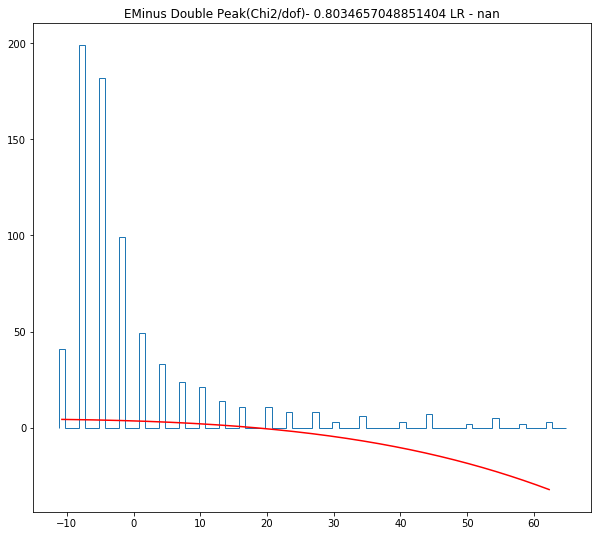

In [7]:
'''
plotting the histograms
'''

for i in range(50, 70):
#for i in select_file_num[10:40]:
    print(select_file_num[i])
    file_name = dataio.I3File('/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_'+str(select_file_num[i])+'_medium_water_custom_mDOM_recoPulse.i3.gz')
    #print('/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_'+str(select_file_num[i])+'_medium_water_custom_mDOM_recoPulse.i3.gz')
    frameList = []
    j = 0
    while(file_name.more()):
        frameList.append(file_name.pop_daq())
    frame_number = int(select_frame_num[i])
    frame_i = frameList[frame_number]
    mctree = frame_i["I3MCTree"]
    primary = mctree.primaries
    lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)    
    
    omkey = OMKey(int(select_string[i]), int(select_DOM[i]), 0)
    print(omkey)
    recoPulseMap = frame_i['I3RecoPulses']
    recoPulseList = recoPulseMap[omkey]
    recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
    recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])
    
    '''
    Removing DOMs with hits less than 100 Hits
    '''
    if sum(recoPulse_chargeList) < 100:
        print(sum(recoPulse_chargeList))
        print('exit1')
        continue

    '''
    Calculating the mean and removing the tails
    '''

    #mean = recoPulse_timeList.mean()
    mean = sum(recoPulse_timeList*recoPulse_chargeList)/sum(recoPulse_chargeList) #mean is weighted
    select_time = recoPulse_timeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
    select_charge = recoPulse_chargeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
    #print('SELECT CHARGE', select_charge, select_time, mean, recoPulse_timeList, recoPulse_chargeList)

    if len(select_time) < 10:
        print('exit2')
        continue

    mean_select_time = sum(select_time*select_charge)/sum(select_charge)
    max_hitTimes = recoPulse_timeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]
    max_charge = recoPulse_chargeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]

    #[using zscore to remove the effect of outliers from the analysis]
    z = stats.zscore(max_hitTimes)
    max_hitTimes = max_hitTimes[(z>-1.6)&(z < 1.2)]
    max_charge = max_charge[(z>-1.6)&(z < 1.2)]

    if len(max_hitTimes) < 10:
        print('exit3')
        continue

    #Shifting mean to zero
    max_hitTimes_mean = sum(max_hitTimes*max_charge)/sum(max_charge)
    timestamps = max_hitTimes - max_hitTimes_mean
    final_mean = timestamps.mean()

    '''
    Histogramming the data from simulation
    '''
    print('Now Histogramming')
    bins = np.arange(min(timestamps), max(timestamps), 1)
    num, bin_edges = np.histogram(timestamps, bins=bins, weights=max_charge)
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
                    
    #removing bins with < 0 entries ---> Recommended for binned likelihood
    entries_in_bins = num[num > 0]
    bin_centers = bin_centers[num > 0]

    #Degrees of freedom should be greater than zero!
    if len(entries_in_bins) < 8:
        continue

    #Getting data for the chi2 fit
    chi2_entries_in_bins = entries_in_bins[entries_in_bins > 10]
    chi2_bin_centers = bin_centers[entries_in_bins > 10]

    num_dataPoints = len(entries_in_bins)
    area_data = sum(entries_in_bins)
    mean_entries = entries_in_bins.mean()

    '''
    Fitting bifurcated Gaussian and double bifurcated gaussian to
    the mcpe hit time distributions for both tau and electron.
    '''

    #Single Peak

    nll = lambda *args: log_likelihood_biGauss(*args)
    initial_biGauss = np.array([final_mean, 50, 5, max(entries_in_bins)])
    bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 500), (0, 10), (0, 1e6))
    soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss,
                                    args=(entries_in_bins, bin_centers),
                                    method='Powell',
                                    bounds = bnds_biGauss)

    #Double Peak

    nll = lambda *args: log_likelihood_doublePeak(*args)
    initial_doublePeak = np.array([min(bin_centers)+10, 20, 1, max(entries_in_bins), final_mean, 20, 1, max(entries_in_bins)])
    bnds_doublePeak = ((min(bin_centers), final_mean), (0, 500), (0, 10), (0, 1e6),
                        (final_mean, max(bin_centers)), (0, 500), (0, 10), (0,1e6))
    soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak,
                                args=(entries_in_bins, bin_centers),
                                method='Powell',
                                bounds=bnds_doublePeak)
    
    LR_biGauss = likelihood_ratio_biGauss(bin_centers, entries_in_bins, soln_biGauss.x[0],
                                              soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
    LR_doublePeak = likelihood_ratio_doublePeak(bin_centers, entries_in_bins, soln_doublePeak.x[0],
                                                    soln_doublePeak.x[1],soln_doublePeak.x[2],
                                                    soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                    soln_doublePeak.x[5], soln_doublePeak.x[6],
                                                    soln_doublePeak.x[7])
    
    '''
    goodness of fit - Chi2 = 2*ln(LR)
    '''
    gof_DOM_biGauss = (2*LR_biGauss)/(num_dataPoints - 4)
    gof_DOM_doublePeak = (2*LR_doublePeak)/(num_dataPoints - 8)
    
    if gof_DOM_doublePeak != gof_DOM_doublePeak:
        print('PARAMETERS -', soln_doublePeak.x[0], soln_doublePeak.x[1],soln_doublePeak.x[2],
                                                    soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                    soln_doublePeak.x[5], soln_doublePeak.x[6],
                                                    soln_doublePeak.x[7])
        
        def log_likelihood_doublePeak_test(theta, n, x):
            pos1, wid1, r1, amp1, pos2, wid2, r2, amp2 = theta
            model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
            L = model - (n*np.log(model))
            print('*****************Double Peak***************', int(i), omkey)
            print(theta, np.sum(L))
            return np.sum(L)
        
        
        soln_doublePeak_test = minimize(log_likelihood_doublePeak_test, initial_doublePeak,
                            args=(entries_in_bins, bin_centers),
                            method='Powell',
                            bounds=bnds_doublePeak)
    
        '''
        (x, y) values for the fit
        '''
        #x = bin_centers
        x = np.linspace(min(bin_centers), max(bin_centers), 1000)
        y_biGauss = biGauss(x, soln_biGauss.x[0],
                            soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
        y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1],
                                        soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                        soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])
    
    
                    
        plt.figure(figsize=(10,9))
        _ = plt.hist(timestamps, bins=bins, weights=max_charge, histtype='step')
        #plt.plot(x, y_biGauss, '-', c = 'k')
        plt.plot(x, y_doublePeak, '-', c = 'r')
        plt.title(str(lepton.type) +' Double Peak(Chi2/dof)- '+ str(select_gof_dp[i])+' LR - '+str(gof_DOM_doublePeak))
        
        break

In [8]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
def log_likelihood_doublePeak_test(theta, n, x):
    pos1, wid1, r1, amp1, pos2, wid2, r2, amp2 = theta
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    L = model - (n*np.log(model))
    print("%0.3f" % L.sum(), ' '.join(["%0.3f" % x for x in theta]))
    return np.sum(L)
        
print('Double peak', '  '.join(['llh','p1','w1','r1','a1','p2','w2','r2','a2']))
        
soln_doublePeak_test = minimize(log_likelihood_doublePeak_test, initial_doublePeak,
                    args=(entries_in_bins, bin_centers),
                    method='TNC',#'TNC',
                    bounds=bnds_doublePeak)

('Double peak', 'llh  p1  w1  r1  a1  p2  w2  r2  a2')
('-1422.774', '-0.729 20.000 1.000 199.000 24.484 20.000 1.000 199.000')
('-1422.774', '-0.729 20.000 1.000 199.000 24.484 20.000 1.000 199.000')
('-1422.774', '-0.729 20.000 1.000 199.000 24.484 20.000 1.000 199.000')
('-1422.774', '-0.729 20.000 1.000 199.000 24.484 20.000 1.000 199.000')
('-1422.774', '-0.729 20.000 1.000 199.000 24.484 20.000 1.000 199.000')
('-1422.774', '-0.729 20.000 1.000 199.000 24.484 20.000 1.000 199.000')
('-1422.774', '-0.729 20.000 1.000 199.000 24.484 20.000 1.000 199.000')
('-1422.774', '-0.729 20.000 1.000 199.000 24.484 20.000 1.000 199.000')
('-1422.774', '-0.729 20.000 1.000 199.000 24.484 20.000 1.000 199.000')
('-1422.774', '-0.729 20.000 1.000 199.000 24.484 20.000 1.000 199.000')
('-1422.862', '-0.729 20.000 1.000 198.996 24.484 20.000 1.000 198.967')
('-1422.862', '-0.729 20.000 1.000 198.996 24.484 20.000 1.000 198.967')
('-1422.862', '-0.729 20.000 1.000 198.996 24.484 20.000 1.000 198.96

('-2100.422', '-0.848 27.670 1.028 203.600 24.517 31.030 0.962 4.722')
('-2100.422', '-0.848 27.670 1.028 203.600 24.517 31.030 0.962 4.722')
('-2100.422', '-0.848 27.670 1.028 203.600 24.517 31.030 0.962 4.722')
('-2121.233', '-0.848 27.670 1.028 203.017 24.517 31.030 0.962 8.212')
('-2121.233', '-0.848 27.670 1.028 203.017 24.517 31.030 0.962 8.212')
('-2121.233', '-0.848 27.670 1.028 203.017 24.517 31.030 0.962 8.212')
('-2121.233', '-0.848 27.670 1.028 203.017 24.517 31.030 0.962 8.212')
('-2121.233', '-0.848 27.670 1.028 203.017 24.517 31.030 0.962 8.212')
('-2121.233', '-0.848 27.670 1.028 203.017 24.517 31.030 0.962 8.212')
('-2121.233', '-0.848 27.670 1.028 203.017 24.517 31.030 0.962 8.212')
('-2121.233', '-0.848 27.670 1.028 203.017 24.517 31.030 0.962 8.212')
('-2121.233', '-0.848 27.670 1.028 203.017 24.517 31.030 0.962 8.212')
('-2121.233', '-0.848 27.670 1.028 203.017 24.517 31.030 0.962 8.212')
('-2124.795', '-0.848 27.670 1.028 200.075 24.517 31.030 0.962 25.660')
('-21

('-2206.034', '-0.917 28.350 1.044 156.908 24.533 33.590 0.945 8.222')
('-2206.034', '-0.917 28.350 1.044 156.908 24.533 33.590 0.945 8.222')
('-2206.034', '-0.917 28.350 1.044 156.908 24.533 33.590 0.945 8.222')
('-2206.034', '-0.917 28.350 1.044 156.908 24.533 33.590 0.945 8.222')
('-2206.034', '-0.917 28.350 1.044 156.908 24.533 33.590 0.945 8.222')
('-2206.034', '-0.917 28.350 1.044 156.908 24.533 33.590 0.945 8.222')
('-2206.034', '-0.917 28.350 1.044 156.908 24.533 33.590 0.945 8.222')
('-2206.034', '-0.917 28.350 1.044 156.908 24.533 33.590 0.945 8.222')
('-2208.175', '-0.917 28.350 1.044 164.484 24.533 33.590 0.945 12.334')
('-2208.175', '-0.917 28.350 1.044 164.484 24.533 33.590 0.945 12.334')
('-2208.175', '-0.917 28.350 1.044 164.484 24.533 33.590 0.945 12.334')
('-2208.175', '-0.917 28.350 1.044 164.484 24.533 33.590 0.945 12.334')
('-2208.175', '-0.917 28.350 1.044 164.484 24.533 33.590 0.945 12.334')
('-2208.175', '-0.917 28.350 1.044 164.484 24.533 33.590 0.945 12.334')


('-2222.640', '-0.918 28.350 1.044 135.201 24.533 33.621 0.945 14.660')
('-2222.640', '-0.918 28.350 1.044 135.201 24.533 33.621 0.945 14.660')
('-2222.640', '-0.918 28.350 1.044 135.201 24.533 33.621 0.945 14.660')
('-2222.640', '-0.918 28.350 1.044 135.201 24.533 33.621 0.945 14.660')
('-2222.640', '-0.918 28.350 1.044 135.201 24.533 33.621 0.945 14.660')
('-2222.640', '-0.918 28.350 1.044 135.201 24.533 33.621 0.945 14.660')
('-2271.562', '-1.066 29.624 1.078 131.332 24.563 38.424 0.911 12.962')
('-2271.562', '-1.066 29.624 1.078 131.332 24.563 38.424 0.911 12.962')
('-2271.562', '-1.066 29.624 1.078 131.332 24.563 38.424 0.911 12.962')
('-2271.562', '-1.066 29.624 1.078 131.332 24.563 38.424 0.911 12.962')
('-2271.562', '-1.066 29.624 1.078 131.332 24.563 38.424 0.911 12.962')
('-2271.562', '-1.066 29.624 1.078 131.332 24.563 38.424 0.911 12.962')
('-2271.562', '-1.066 29.624 1.078 131.332 24.563 38.424 0.911 12.962')
('-2271.562', '-1.066 29.624 1.078 131.332 24.563 38.424 0.911 1

('-2406.933', '-3.738 27.648 1.633 155.763 24.930 94.487 0.473 11.367')
('-2406.933', '-3.738 27.648 1.633 155.763 24.930 94.487 0.473 11.367')
('-2406.933', '-3.738 27.648 1.633 155.763 24.930 94.487 0.473 11.367')
('-2406.933', '-3.738 27.648 1.633 155.763 24.930 94.487 0.473 11.367')
('-2406.933', '-3.738 27.648 1.633 155.763 24.930 94.487 0.473 11.367')
('-2406.933', '-3.738 27.648 1.633 155.763 24.930 94.487 0.473 11.367')
('-2406.933', '-3.738 27.648 1.633 155.763 24.930 94.487 0.473 11.367')
('-2406.933', '-3.738 27.648 1.633 155.763 24.930 94.487 0.473 11.367')
('-2406.933', '-3.738 27.648 1.633 155.763 24.930 94.487 0.473 11.367')
('-2406.933', '-3.738 27.648 1.633 155.763 24.930 94.487 0.473 11.367')
('-2406.933', '-3.738 27.648 1.633 155.763 24.930 94.487 0.473 11.367')
('-2406.933', '-3.738 27.648 1.633 155.763 24.930 94.487 0.473 11.367')
('-2406.933', '-3.738 27.648 1.633 155.763 24.930 94.487 0.473 11.367')
('-2406.941', '-3.738 27.647 1.633 155.765 24.930 94.490 0.473 1

('-2423.404', '-4.351 26.683 1.490 157.087 24.604 97.140 1.031 9.426')
('-2423.404', '-4.351 26.683 1.490 157.087 24.604 97.140 1.031 9.426')
('-2423.410', '-4.351 26.678 1.491 157.094 24.604 97.154 1.030 9.428')
('-2423.410', '-4.351 26.678 1.491 157.094 24.604 97.154 1.030 9.428')
('-2423.410', '-4.351 26.678 1.491 157.094 24.604 97.154 1.030 9.428')
('-2423.410', '-4.351 26.678 1.491 157.094 24.604 97.154 1.030 9.428')
('-2423.410', '-4.351 26.678 1.491 157.094 24.604 97.154 1.030 9.428')
('-2423.410', '-4.351 26.678 1.491 157.094 24.604 97.154 1.030 9.428')
('-2423.410', '-4.351 26.678 1.491 157.094 24.604 97.154 1.030 9.428')
('-2423.410', '-4.351 26.678 1.491 157.094 24.604 97.154 1.030 9.428')
('-2423.410', '-4.351 26.678 1.491 157.094 24.604 97.154 1.030 9.428')
('-2423.410', '-4.351 26.678 1.491 157.094 24.604 97.154 1.030 9.428')
('-2423.560', '-4.406 26.049 1.533 157.987 24.569 98.801 0.935 9.698')
('-2423.560', '-4.406 26.049 1.533 157.987 24.569 98.801 0.935 9.698')
('-242

('-2423.662', '-4.382 26.323 1.513 157.587 24.579 98.071 0.978 9.579')
('-2423.662', '-4.382 26.323 1.513 157.587 24.579 98.071 0.978 9.579')
('-2423.670', '-4.387 26.262 1.518 157.670 24.568 98.236 0.969 9.606')
('-2423.670', '-4.387 26.262 1.518 157.670 24.568 98.236 0.969 9.606')
('-2423.670', '-4.387 26.262 1.518 157.670 24.568 98.236 0.969 9.606')
('-2423.670', '-4.387 26.262 1.518 157.670 24.568 98.236 0.969 9.606')
('-2423.670', '-4.387 26.262 1.518 157.670 24.568 98.236 0.969 9.606')
('-2423.670', '-4.387 26.262 1.518 157.670 24.568 98.236 0.969 9.606')
('-2423.670', '-4.387 26.262 1.518 157.670 24.568 98.236 0.969 9.606')
('-2423.670', '-4.387 26.262 1.518 157.670 24.568 98.236 0.969 9.606')
('-2423.670', '-4.387 26.262 1.518 157.670 24.568 98.236 0.969 9.606')
('-2423.670', '-4.387 26.262 1.518 157.670 24.568 98.236 0.969 9.606')
('-2423.670', '-4.387 26.262 1.518 157.670 24.568 98.236 0.969 9.606')
('-2423.670', '-4.387 26.262 1.518 157.670 24.568 98.236 0.969 9.606')
('-242

In [ ]:
def log_likelihood_doublePeak_test(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2):
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    L = model - (n*np.log(model))
    print('*****************Double Peak***************', int(i), omkey)
    return np.sum(L)

In [ ]:
# The minuit magic

In [123]:
class peakCalculators(object):
    def __init__(self):
        print 'Hello!'
    
    def setData(self, bin_centers, data):
        self.n = data
        self.x = bin_centers
        
    def getDoublePeakLLH(self, theta):
        
        model = double_peak(self.x, *theta)
        #print model
        #print self.n
        LLH = np.sum(model - (self.n*np.log(model)))
        
        #print LLH, theta
        
        
        return LLH
    
    def getBestFit(self):
        
        # Set limits
        extra_settings = {'limit_pos1': (self.x.min(), self.x.mean()),
                          'limit_wid1': (0, 500.),
                          'limit_r1': (0, 10.),
                          'limit_amp1':(0, self.n.max()*10),
                          'limit_pos2': (self.x.mean(), self.x.max()),
                          'limit_wid2': (0, 500.),
                          'limit_r2': (0, 10.),
                          'limit_amp2': (0, self.n.max()*10),
                          
                          'pos1': self.x.mean()-1.,
                          'wid1': 10.,
                          'r1': 0.8,
                          'amp1': self.n.max()/2.,
                          'pos2': self.x.mean()+2.,
                          'wid2': 15.,
                          'r2': 1.1,
                          'amp2': self.n.max()/3.,
                          'error_r1':0.1,
                          'error_r2':0.1
        }
        
        
        m = iminuit.Minuit(self.getDoublePeakLLH,
                           forced_parameters = ['pos1', 'wid1', 'r1', 'amp1', 
                                                'pos2', 'wid2', 'r2', 'amp2'],
                           #print_level=0,
                           errordef = 0.5,
                              use_array_call = True,
                          **extra_settings)
        
        fit = m.migrad()
        
        return m



In [124]:
llhfun = peakCalculators()

Hello!


In [125]:
llhfun.setData( bin_centers, entries_in_bins)
llhfun.getDoublePeakLLH(initial_doublePeak)

-1422.7739802932583

In [126]:
m = llhfun.getBestFit()

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:52: InitialParamWarning: Parameter pos1 is floating but does not have initial step size. Assume 1.
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:52: InitialParamWarning: Parameter wid1 is floating but does not have initial step size. Assume 1.
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:52: InitialParamWarning: Parameter amp1 is floating but does not have initial step size. Assume 1.
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:52: InitialParamWarning: Parameter pos2 is floating but does not have initial step size. Assume 1.
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:52: InitialParamWarning: Parameter wid2 is floating bu

FCN = -2477.60298899 
 TOTAL NCALL = 1686 
 NCALLS = 1686 
 
 
 EDM = 3.50345849873e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Hesse Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 Fixed? 
 
 
 0 
 pos1 
 -10.7272 
 0.00172406 
 
 
 -10.7286 
 22.5095 
 No 
 
 
 1 
 wid1 
 17.1262 
 0.847268 
 
 
 0 
 500 
 No 
 
 
 2 
 r1 
 9.77271e-05 
 0.000121672 
 
 
 0 
 10 
 No 
 
 
 3 
 amp1 
 211.594 
 13.5051 
 
 
 0 
 1990 
 No 
 
 
 4 
 pos2 
 22.5095 
 2.49062 
 
 
 22.5095 
 62.2714 
 No 
 
 
 5 
 wid2 
 499.629 
 499.678 
 
 
 0 
 500 
 No 
 
 
 6 
 r2 
 8.6557 
 1.32024 
 
 
 0 
 10 
 No 
 
 
 7 
 amp2 
 9.36235 
 1.24436 
 
 
 0 
 1990 
 No 
 
 
 
 
\begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Hesse Error & Minos Error- & Minos Error+ & Limit- & Limit+ & Fixed?\\
\hline
0 & pos1 & -10.7272 & 0.00172406 & & & -10.7285582628 & 22.5095 & No\\
\hline
1 & wid1 & 17.1262 & 0.847268 & & & 0.0 & 500 & No\\
\hline
2 & r1 & 9.77271e-05 & 0.000121672 & & & 0.0 & 10 & No\\
\hline
3 & amp1 & 211.594 & 13.5051 & & & 0.0 & 1990 & No\\
\hline
4 & pos2 & 22.5095 & 2.49062 & & & 22.5095369753 & 62.2714 & No\\
\hline
5 & wid2 & 499.629 & 499.678 & & & 0.0 & 500 & No\\
\hline
6 & r2 & 8.6557 & 1.32024 & & & 0.0 & 10 & No\\
\hline
7 & amp2 & 9.36235 & 1.24436 & & & 0.0 & 1990 & No\\
\hline
\end{tabular}

In [122]:
m.fval

-2477.6029889857555

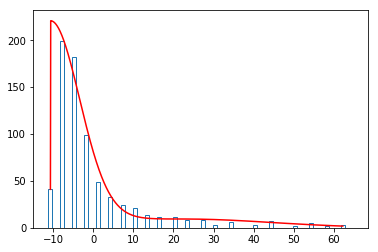

In [120]:
np.array(m.args)
x = np.linspace(min(bin_centers), max(bin_centers), 1000)
y_doublePeak = double_peak(x,*np.array(m.args))
plt.plot(x, y_doublePeak, '-', c = 'r')
_ = plt.hist(timestamps, bins=bins, weights=max_charge, histtype='step')
